In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [4]:
image = cv2.imread('sar_2_color.jpg')

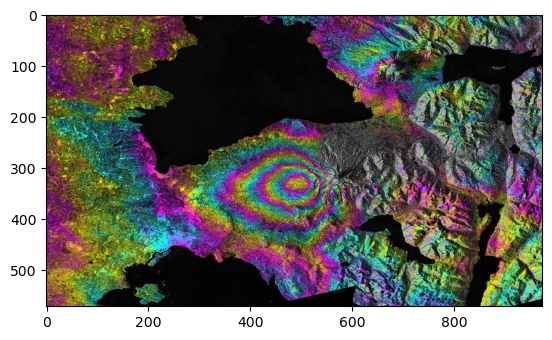

In [5]:
plt.imshow(image)

In [6]:
image.shape # h,w,c

(572, 974, 3)

In [7]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [8]:
# ROI
img_roi = image[100:200, 500:700]

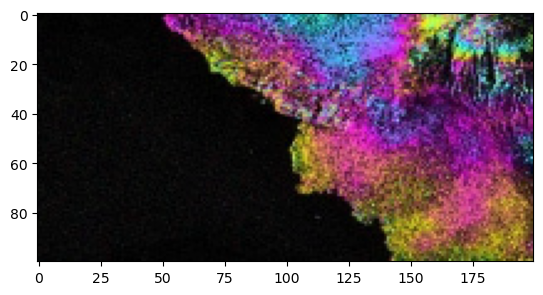

In [9]:
plt.imshow(img_roi)

In [10]:
b,g,r = cv2.split(image)

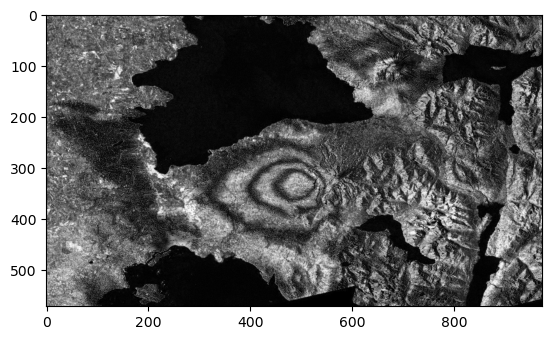

In [11]:
plt.imshow(b, cmap = 'gray')

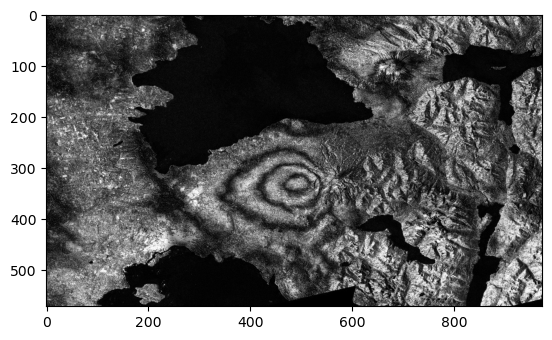

In [12]:
plt.imshow(g, cmap = 'gray')

In [13]:
# alternative approach
b = image[:,:,0]

In [14]:
import copy

image2 = copy.deepcopy(image)

In [15]:
image2[50:100,50:100] = [0,0,0]

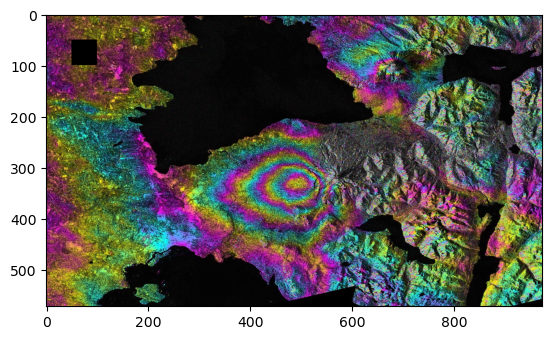

In [16]:
plt.imshow(image2)

In [17]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

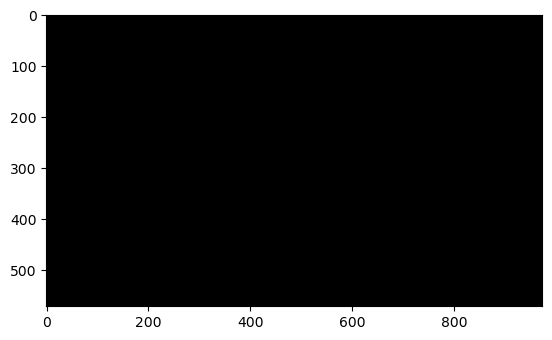

In [18]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [19]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [20]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [21]:
image_gray[0,0]

np.uint8(40)

In [22]:
image_gray.shape

(572, 974)

In [23]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [24]:
image_hsv.shape

(572, 974, 3)

In [25]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [26]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [27]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [28]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [29]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

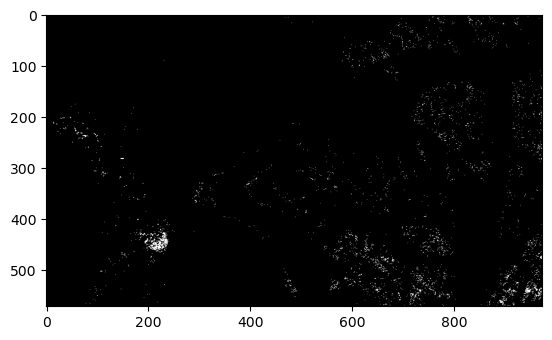

In [30]:
plt.imshow(thresh1, cmap='gray')

In [31]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [32]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

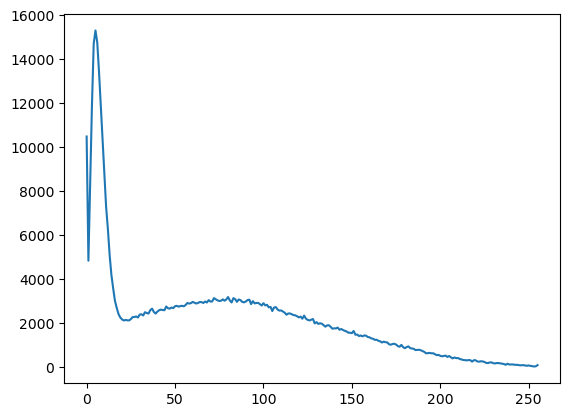

In [33]:
plt.plot(b_hist)

In [34]:
b_hist_cum = b_hist.cumsum()

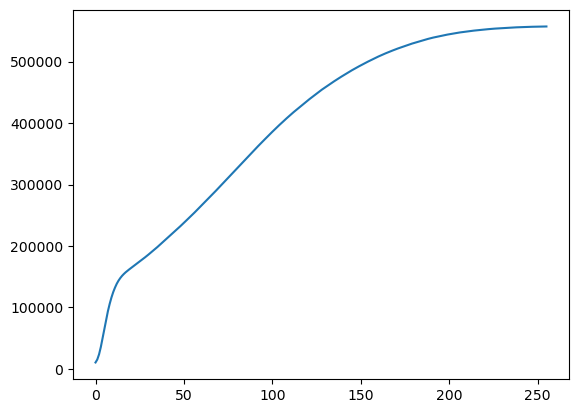

In [35]:
plt.plot(b_hist_cum)

In [36]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

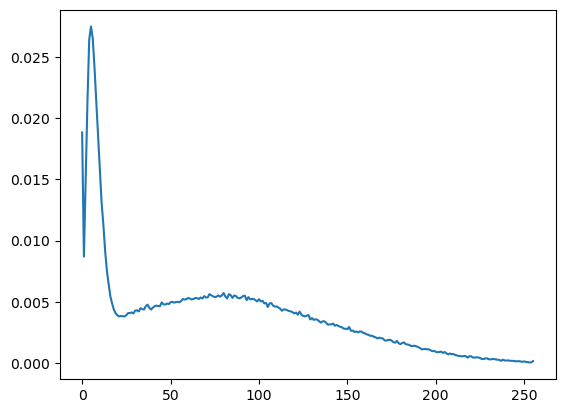

In [37]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [38]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


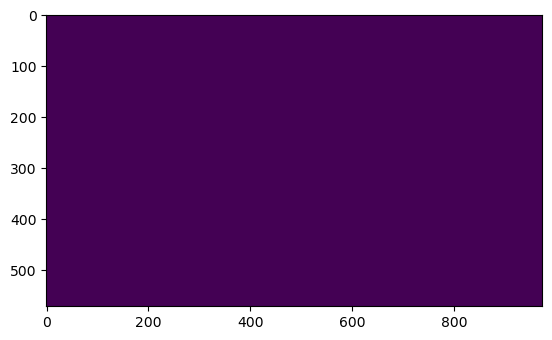

In [39]:
plt.imshow(diff)

In [40]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [41]:
mean = image_gray.mean()

In [42]:
std = image_gray.std()

In [43]:
print(mean,std)

67.41225535245043 52.016191875959635


In [44]:
eq_gray = cv2.equalizeHist(image_gray)

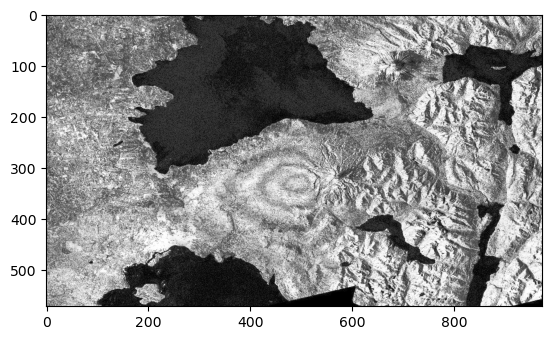

In [45]:
plt.imshow(eq_gray, cmap="gray")


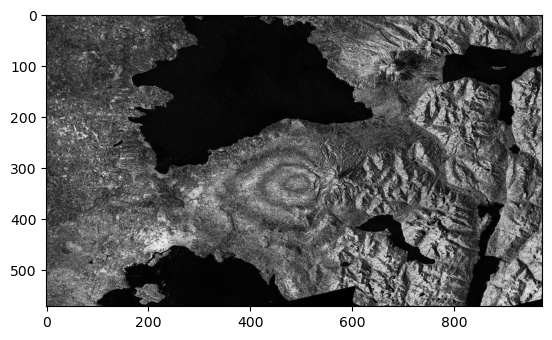

In [46]:
plt.imshow(image_gray, cmap="gray")

In [47]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [48]:
#1
image = cv2.imread('sar_1_gray.jpg')
b = image[:, :, 0]

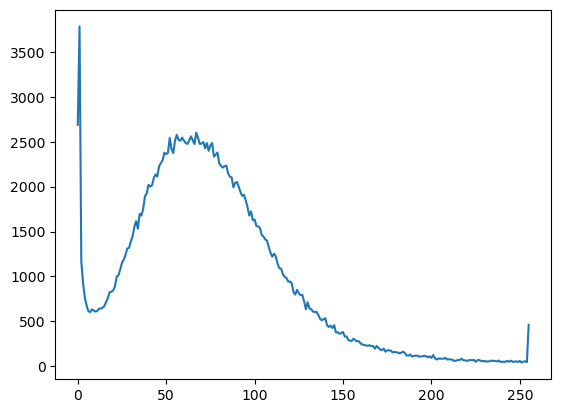

In [49]:
# 2
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

plt.plot(b_hist)
plt.show()

![](Figure_1.png)

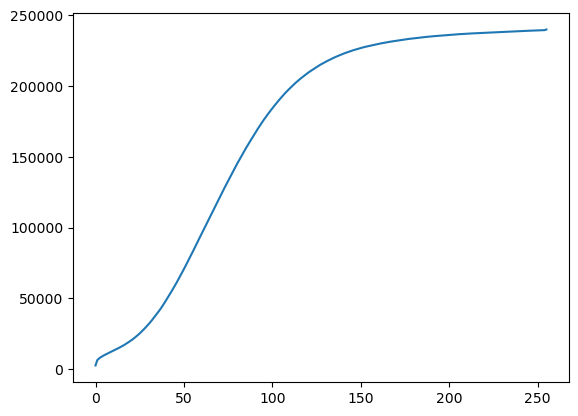

In [50]:
b_hist_cum = b_hist.cumsum()
plt.plot(b_hist_cum)
plt.show()

![](Figure_2.png)

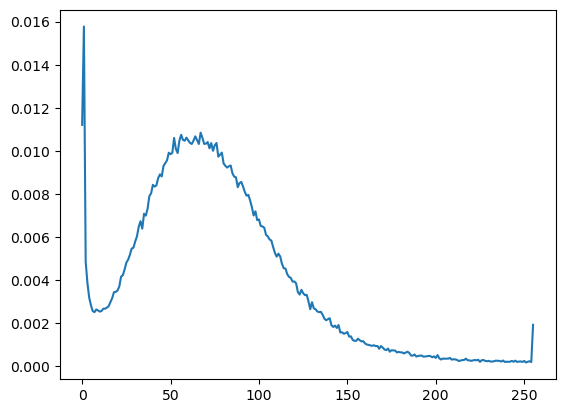

In [51]:
b_hist_norm = b_hist/(image.shape[0] * image.shape[1])
plt.plot(b_hist_norm)
plt.show()

![](Figure_3.png)

In [52]:
# 3
gamma = 1.1

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v_float = v.astype(np.float32) / 255.0
v_corrected = np.power(v_float, gamma)
v = np.uint8(v_corrected * 255)
hsv_corrected = cv2.merge([h, s, v])

image_gamma_hsv = cv2.cvtColor(hsv_corrected, cv2.COLOR_HSV2BGR)

SSIM: 0.9869210487665899


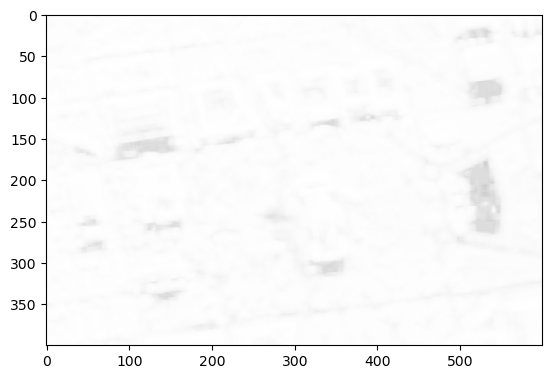

MSE =  64.54242916666666


In [53]:
# 4
(ssim, diff) = structural_similarity(image, image_gamma_hsv, full=True, channel_axis=-1)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

plt.imshow(diff)
plt.show()

mse = mean_squared_error(image, image_gamma_hsv)
print("MSE = ", mse)

![](Figure_4.png)

SSIM: 0.9869210487665899
MSE =  64.54242916666666

74.94157083333333 43.658465466227916


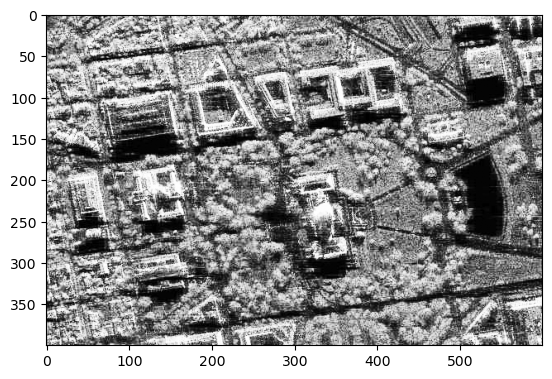

In [54]:
# 5
mean = image.mean()
std = image.std()
print(mean, std)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eq_gray = cv2.equalizeHist(gray)

plt.imshow(eq_gray, cmap="gray")
plt.show()

74.94157083333333 43.658465466227916

![](Figure_5.png)

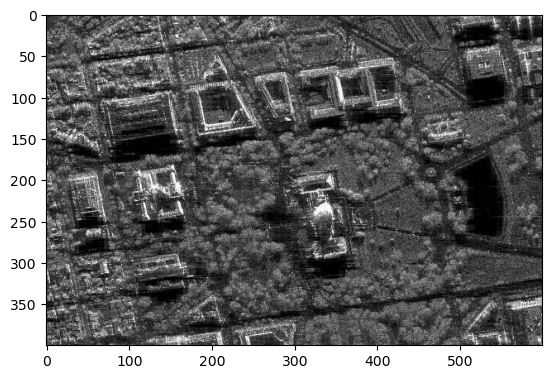

In [55]:
plt.imshow(gray, cmap="gray")
plt.show()

![](Figure_6.png)

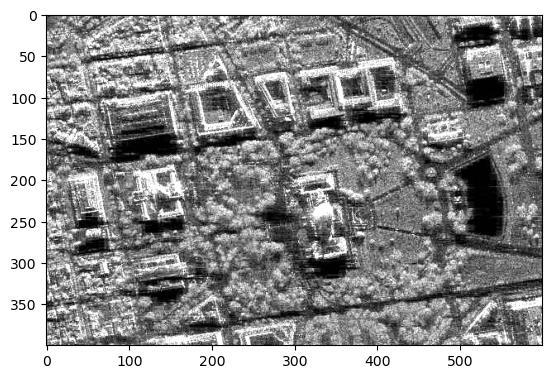

In [56]:
mean_src, std_src = gray.mean(), gray.std()
mean_ref, std_ref = eq_gray.mean(), eq_gray.std()

gray_corrected = (gray - mean_src) / (std_src + 1e-8) * std_ref + mean_ref
gray_corrected = np.clip(gray_corrected, 0, 255).astype(np.uint8)
plt.imshow(gray_corrected, cmap="gray")
plt.show()

![](Figure_111.png)

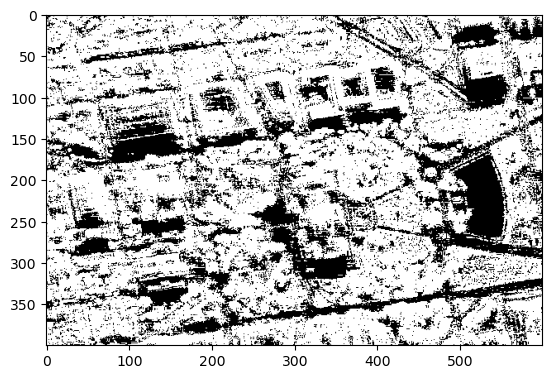

w = 169178 b = 70822


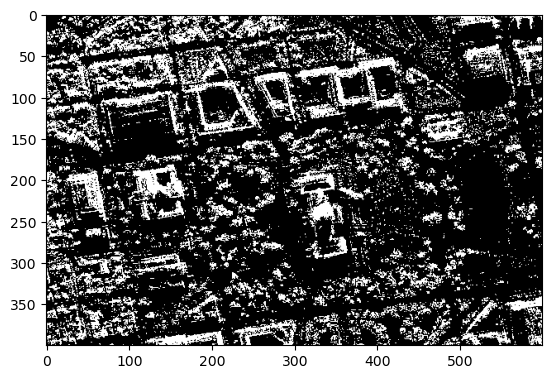

w = 55653 b = 184347


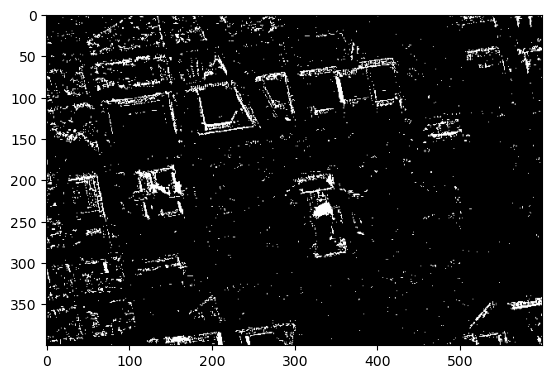

w = 13083 b = 226917


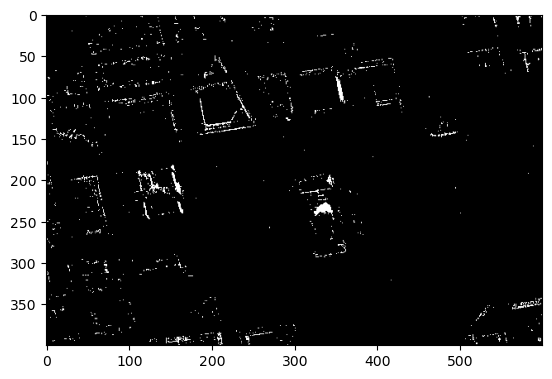

w = 3830 b = 236170


In [57]:
# 6
for i in range(50, 250, 50):
    _, thresh1 = cv2.threshold(gray, i, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh1, cmap='gray')
    plt.show()

    result_white = (thresh1 == 255).sum()
    result_black = (thresh1 == 0).sum()
    print("w =", result_white, "b =", result_black)